<a href="https://colab.research.google.com/github/boson-jin/blog_eng-kor/blob/master/img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#이미지 처리 라이브러리
import cv2  

#이미지 시각화 라이브러리
import matplotlib.pyplot as plt 

#사용할 이미지를 가져오는 곳
import tensorflow_datasets as tfds

#딥러닝 모델을 만들기 위한 라이브러리  
import tensorflow as tf 

In [ ]:
# 데이터 가져오기, cats_vs_dogs 데이터셋을 가져옴, test셋이 없어서 train 셋만 가져옴, 데이터 정보도 가져옴
data_train, ds_info = tfds.load('cats_vs_dogs', split=[tfds.Split.TRAIN], with_info=True)
ds_info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and

In [ ]:
# 가져온 데이터로부터 30개만 받아온다. 각각의 이미지를 넘파이 형식으로 받는다.
images = [one['image'].numpy() for one in data_train[0].take(30)]
len(images)

30

(-0.5, 499.5, 359.5, -0.5)

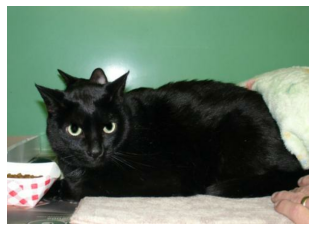

In [ ]:
#불러온 이미지를 확인하기
plt.imshow(images[11])
plt.axis('off')

In [ ]:
#resNet 사용, imagenet으로 학습된 인공지능의 가중치를 가져옴, 이미지 크기는 224, 224, 3
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224,224,3))

In [ ]:
#모델에 대한 정보
resnet50_pre.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# 예측 결과를 어떤 대상인지 바꿔줘야함
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [ ]:
# 예측하는 함수
# 이미지를 입력하면 이미지를 보여준다.
def pred_img(img):
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  
  # 이미지를 재조정
  img_resized = cv2.resize(img, (224,224))

  # 예측하기, batch로 학습시키기 때문에 사이즈를 변화시킴
  pred = resnet50_pre.predict(img_resized.reshape([1, 224,224, 3]))

  # 예측 결과를 어떤 대상인지 바꿔줌
  decoded_pred = decode_predictions(pred)

  # 결과 1~5위까지 알아보기
  for i, instance in enumerate(decoded_pred[0]):
    # 몇위, 대상이 무엇인지, 몇퍼센트의 확률인지
    print('{}위: {} ({:.2f}%)'.format(i+1, instance[1], instance[2]*100))

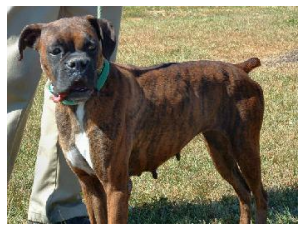

1/1 [==============================] - 0s 309ms/step
1위: boxer (84.50%)
2위: German_short-haired_pointer (9.20%)
3위: Weimaraner (2.95%)
4위: Great_Dane (0.90%)
5위: giant_schnauzer (0.42%)


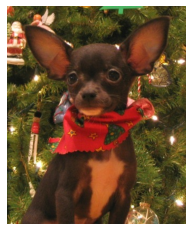

1/1 [==============================] - 0s 254ms/step
1위: Chihuahua (90.09%)
2위: miniature_pinscher (4.65%)
3위: French_bulldog (2.58%)
4위: Boston_bull (0.80%)
5위: boxer (0.45%)


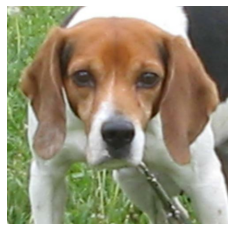

1/1 [==============================] - 0s 258ms/step
1위: German_short-haired_pointer (32.21%)
2위: beagle (31.17%)
3위: Weimaraner (20.55%)
4위: bluetick (5.85%)
5위: English_setter (3.35%)


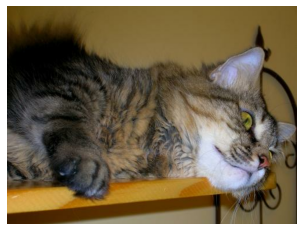

1/1 [==============================] - 0s 370ms/step
1위: tabby (43.60%)
2위: lynx (16.35%)
3위: tiger_cat (14.93%)
4위: Egyptian_cat (6.43%)
5위: Persian_cat (3.99%)


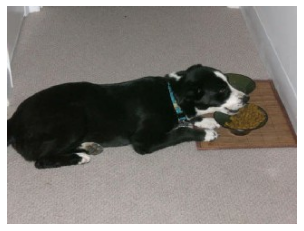

1/1 [==============================] - 0s 223ms/step
1위: Boston_bull (16.58%)
2위: Appenzeller (11.26%)
3위: Staffordshire_bullterrier (9.44%)
4위: Greater_Swiss_Mountain_dog (8.46%)
5위: collie (7.79%)


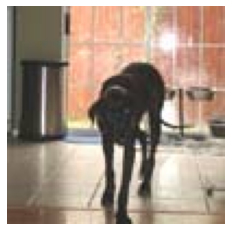

1/1 [==============================] - 0s 239ms/step
1위: Great_Dane (48.84%)
2위: redbone (28.99%)
3위: tusker (4.38%)
4위: Weimaraner (3.46%)
5위: bloodhound (2.59%)


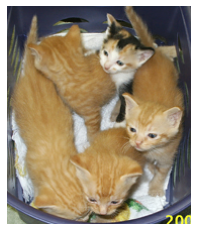

1/1 [==============================] - 0s 252ms/step
1위: ashcan (28.88%)
2위: plastic_bag (27.71%)
3위: bucket (6.52%)
4위: cup (5.80%)
5위: caldron (2.57%)


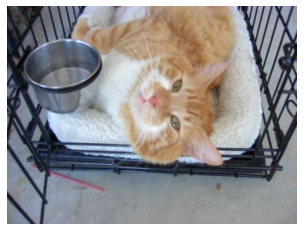

1/1 [==============================] - 0s 312ms/step
1위: dishwasher (31.37%)
2위: shopping_cart (22.05%)
3위: plate_rack (14.08%)
4위: electric_fan (7.90%)
5위: strainer (5.74%)


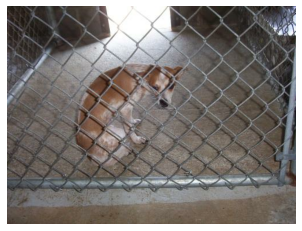

1/1 [==============================] - 0s 421ms/step
1위: chainlink_fence (49.15%)
2위: electric_fan (7.18%)
3위: Samoyed (5.70%)
4위: French_bulldog (5.59%)
5위: Siberian_husky (5.02%)


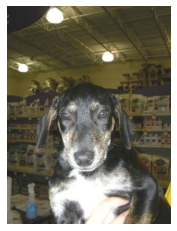

1/1 [==============================] - 0s 461ms/step
1위: Scottish_deerhound (13.62%)
2위: miniature_pinscher (7.55%)
3위: kelpie (6.51%)
4위: bluetick (5.03%)
5위: Airedale (4.24%)


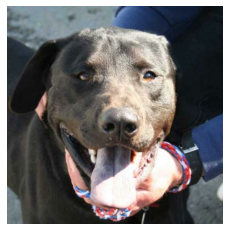

1/1 [==============================] - 0s 440ms/step
1위: American_Staffordshire_terrier (79.58%)
2위: Weimaraner (8.67%)
3위: Great_Dane (3.24%)
4위: bull_mastiff (2.97%)
5위: Staffordshire_bullterrier (2.26%)


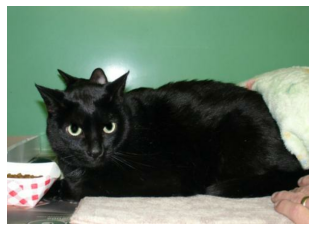

1/1 [==============================] - 0s 391ms/step
1위: Egyptian_cat (13.10%)
2위: paper_towel (11.39%)
3위: tub (10.80%)
4위: tiger_cat (6.82%)
5위: shower_curtain (3.04%)


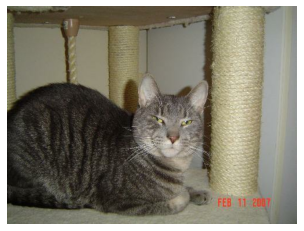

1/1 [==============================] - 0s 434ms/step
1위: shower_curtain (33.54%)
2위: tiger_cat (20.74%)
3위: tabby (17.58%)
4위: Egyptian_cat (4.44%)
5위: paper_towel (3.47%)


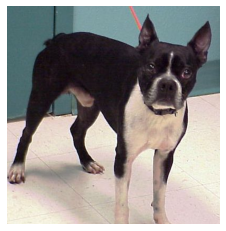

1/1 [==============================] - 0s 453ms/step
1위: Boston_bull (97.16%)
2위: Chihuahua (1.27%)
3위: French_bulldog (0.49%)
4위: kelpie (0.42%)
5위: miniature_pinscher (0.28%)


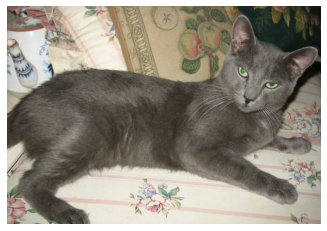

1/1 [==============================] - 0s 426ms/step
1위: tiger_cat (38.00%)
2위: Egyptian_cat (20.54%)
3위: Siamese_cat (18.59%)
4위: lynx (9.30%)
5위: tabby (4.62%)


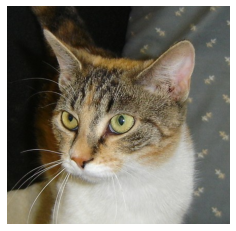

1/1 [==============================] - 0s 464ms/step
1위: tabby (45.78%)
2위: tiger_cat (30.16%)
3위: Egyptian_cat (9.22%)
4위: lynx (4.09%)
5위: Siamese_cat (3.26%)


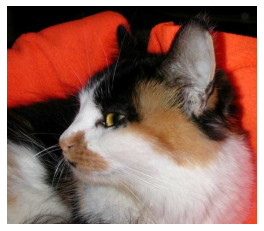

1/1 [==============================] - 0s 495ms/step
1위: Persian_cat (34.20%)
2위: Siamese_cat (14.96%)
3위: tabby (7.17%)
4위: lynx (6.88%)
5위: tiger_cat (6.49%)


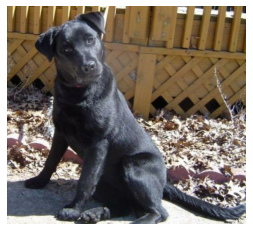

1/1 [==============================] - 1s 530ms/step
1위: kelpie (54.73%)
2위: Chesapeake_Bay_retriever (37.84%)
3위: Labrador_retriever (1.33%)
4위: miniature_pinscher (1.28%)
5위: schipperke (0.73%)


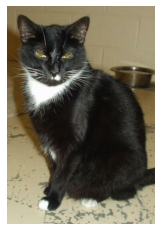

1/1 [==============================] - 0s 426ms/step
1위: Egyptian_cat (38.22%)
2위: Siamese_cat (35.52%)
3위: tabby (14.97%)
4위: tiger_cat (2.86%)
5위: schipperke (1.02%)


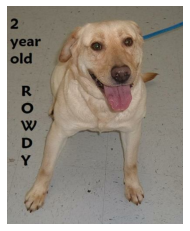

1/1 [==============================] - 0s 458ms/step
1위: pug (23.54%)
2위: kuvasz (21.13%)
3위: Chihuahua (10.11%)
4위: Labrador_retriever (8.21%)
5위: kelpie (7.79%)


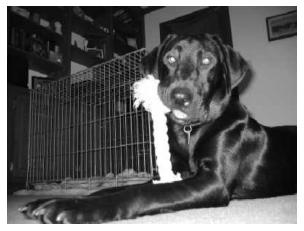

1/1 [==============================] - 0s 460ms/step
1위: Rottweiler (31.66%)
2위: Labrador_retriever (29.10%)
3위: black-and-tan_coonhound (22.48%)
4위: Weimaraner (6.39%)
5위: Irish_setter (5.60%)


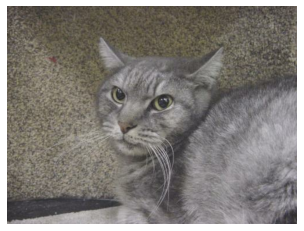

1/1 [==============================] - 0s 426ms/step
1위: lynx (41.81%)
2위: tabby (13.99%)
3위: tiger_cat (13.27%)
4위: Egyptian_cat (10.21%)
5위: Siamese_cat (2.43%)


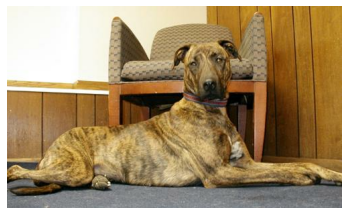

1/1 [==============================] - 1s 583ms/step
1위: Great_Dane (37.74%)
2위: Scottish_deerhound (11.86%)
3위: Afghan_hound (11.54%)
4위: Doberman (6.79%)
5위: Italian_greyhound (6.19%)


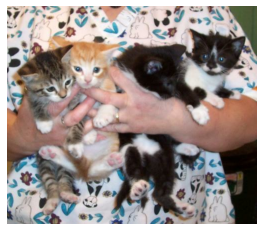

1/1 [==============================] - 0s 459ms/step
1위: schipperke (13.89%)
2위: miniature_pinscher (13.83%)
3위: Bernese_mountain_dog (4.91%)
4위: hen-of-the-woods (3.39%)
5위: kelpie (2.53%)


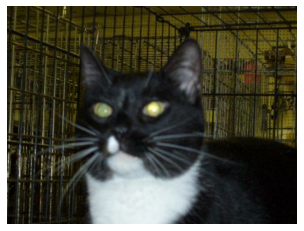

1/1 [==============================] - 1s 640ms/step
1위: window_screen (28.57%)
2위: Egyptian_cat (26.10%)
3위: Siamese_cat (15.82%)
4위: lynx (2.72%)
5위: tabby (2.49%)


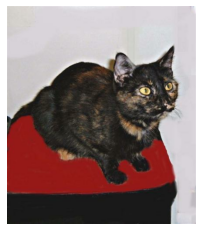

1/1 [==============================] - 1s 876ms/step
1위: tabby (16.65%)
2위: tiger_cat (12.37%)
3위: toilet_seat (7.72%)
4위: printer (5.36%)
5위: schipperke (5.21%)


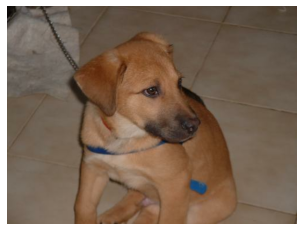

1/1 [==============================] - 1s 594ms/step
1위: Labrador_retriever (55.25%)
2위: Weimaraner (7.27%)
3위: Brittany_spaniel (2.57%)
4위: bath_towel (2.34%)
5위: beagle (2.21%)


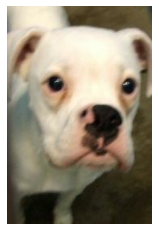

1/1 [==============================] - 1s 514ms/step
1위: French_bulldog (86.73%)
2위: boxer (5.24%)
3위: Boston_bull (2.94%)
4위: Brabancon_griffon (1.01%)
5위: pug (0.91%)


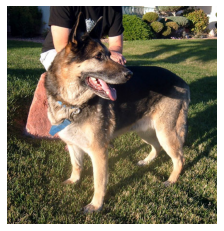

1/1 [==============================] - 0s 217ms/step
1위: Norwegian_elkhound (74.03%)
2위: Siberian_husky (16.85%)
3위: schipperke (7.42%)
4위: Eskimo_dog (0.50%)
5위: kelpie (0.33%)


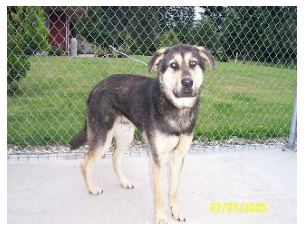

1/1 [==============================] - 0s 296ms/step
1위: Saluki (43.20%)
2위: whippet (25.26%)
3위: Scottish_deerhound (9.17%)
4위: Great_Dane (7.90%)
5위: borzoi (5.48%)


In [ ]:
 for i in range(30): 
  pred_img(images[i])